<a href="https://colab.research.google.com/github/Saumik17rkl/Saumik17rkl-3d_ML/blob/main/multi_view_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-view Diffusion

Multi-view diffusion is a type of diffusion model that turns an image of an object into multiple views of that object.

## Setup

Install the required libraries.

Here, we use a custom [requirements file](https://huggingface.co/spaces/dylanebert/multi-view-diffusion/blob/main/requirements.txt) to install a large number of dependencies. This is because the [Diffusers](https://huggingface.co/docs/diffusers/en/index) library doesn't officially support multi-view diffusion.

In [2]:
!pip install -r https://huggingface.co/spaces/dylanebert/multi-view-diffusion/raw/main/requirements.txt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of accelerate to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of accelerate to determine which version is compatible with other requirements. This could take a while.
INFO: This is tak

## Pipeline

Create a multi-view diffusion pipeline. Diffusers doesn't officially support multi-view-diffusion, so we load a [custom pipeline](https://huggingface.co/docs/diffusers/v0.6.0/en/using-diffusers/custom_pipelines).

Load the input image.

In [5]:
!pip install xformers kiui

In [1]:
import torch
from diffusers import DiffusionPipeline

multi_view_diffusion_pipeline = DiffusionPipeline.from_pretrained(
    "dylanebert/multi-view-diffusion",
    custom_pipeline="dylanebert/multi-view-diffusion",
    trust_remote_code=True
).to("cpu")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Keyword arguments {'trust_remote_code': True} are not expected by MVDreamPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Expected types for unet: (<class 'diffusers_modules.local.dylanebert--multi-view-diffusion.3916e5568b2ee54ea8a81ce4961609158b2c464d.pipeline.MultiViewUNetModel'>,), got <class 'diffusers_modules.local.mv_unet.MultiViewUNetModel'>.


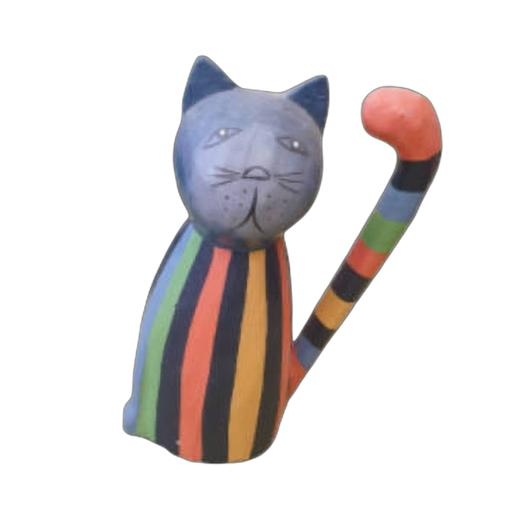

In [2]:
import requests
from PIL import Image
from io import BytesIO


image_url = "https://huggingface.co/datasets/dylanebert/3d-arena/resolve/main/inputs/images/a_cat_statue.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))
image

Pass the image through the multi-view diffusion pipeline.

  0%|          | 0/30 [00:00<?, ?it/s]

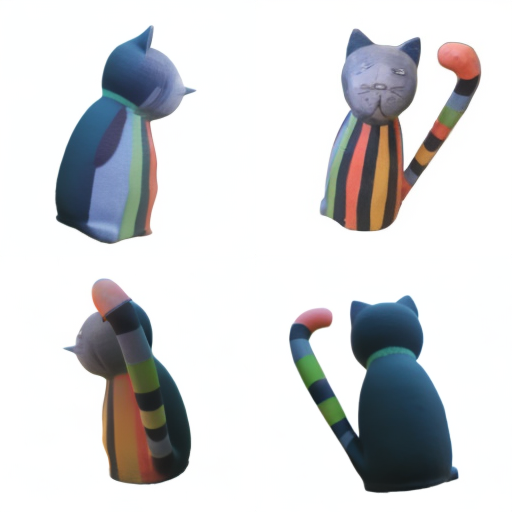

In [3]:
import numpy as np

def create_image_grid(images):
    images = [Image.fromarray((img * 255).astype("uint8")) for img in images]

    width, height = images[0].size
    grid_img = Image.new("RGB", (2 * width, 2 * height))

    grid_img.paste(images[0], (0, 0))
    grid_img.paste(images[1], (width, 0))
    grid_img.paste(images[2], (0, height))
    grid_img.paste(images[3], (width, height))

    return grid_img

image = np.array(image, dtype=np.float32) / 255.0
images = multi_view_diffusion_pipeline("", image, guidance_scale=5, num_inference_steps=30, elevation=0)

create_image_grid(images)

## Gradio Demo

In [4]:
import gradio as gr

def run(image):
  image = np.array(image, dtype=np.float32) / 255.0
  images = multi_view_diffusion_pipeline("", image, guidance_scale=5, num_inference_steps=30, elevation=0)

  images = [Image.fromarray((img * 255).astype("uint8")) for img in images]

  width, height = images[0].size
  grid_img = Image.new("RGB", (2 * width, 2 * height))

  grid_img.paste(images[0], (0, 0))
  grid_img.paste(images[1], (width, 0))
  grid_img.paste(images[2], (0, height))
  grid_img.paste(images[3], (width, height))

  return grid_img

demo = gr.Interface(fn=run, inputs="image", outputs="image")
demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c669f49a2c52df5c2a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
